In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [107]:
def load_data(file_path):
    return pd.read_csv(file_path)

In [108]:
df = pd.read_csv('auto-mpg.csv')

In [109]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


Let us keep the 'mpg' variable as the response(dependent) variable and all other variables except 'car name' as dependent variables. The variable 'mpg' is a numerical variable. Since, we have the 'mpg' variable values for the instances in the data, it is a supervised problem and moreover a linear regression problem. 

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


Looks like all the data types looks consistent except for horsepower and there are no missing values. Let's take a deeper look.

In [111]:
#converting 'horsepower' to float data type
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
#dropping rows with values 'na'
df = df.dropna(subset=['horsepower'])
df.reset_index(drop=True, inplace=True)

In [112]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


The data range for the weight attribute is in thousands whereas for the other attributes its in units and tens. Let's perform a L2 normalization before building a linear regression model.

Since the data has no missing values and the data distribution is fine, we could dive into correlation analysis

array([[<AxesSubplot:title={'center':'mpg'}>,
        <AxesSubplot:title={'center':'cylinders'}>,
        <AxesSubplot:title={'center':'displacement'}>],
       [<AxesSubplot:title={'center':'horsepower'}>,
        <AxesSubplot:title={'center':'weight'}>,
        <AxesSubplot:title={'center':'acceleration'}>],
       [<AxesSubplot:title={'center':'model year'}>,
        <AxesSubplot:title={'center':'origin'}>, <AxesSubplot:>]],
      dtype=object)

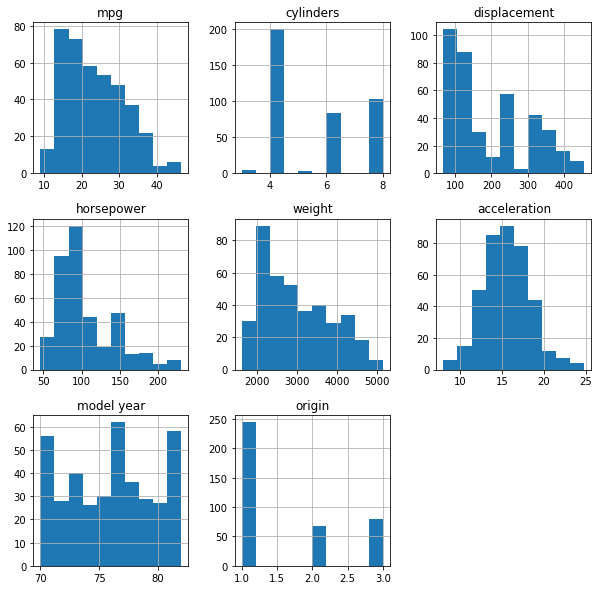

In [113]:
df.hist(figsize=(10,10))

In [114]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
model year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [115]:
#since we are not using the 'car name' attribute, let's delete this column
df.drop('car name',axis=1, inplace=True)

# L2 Normalization

In [116]:
# defining predictor and response variables
X = df.drop(['mpg'], axis=1)
y = df['mpg'].copy()

In [117]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     392 non-null    int64  
 1   displacement  392 non-null    float64
 2   horsepower    392 non-null    float64
 3   weight        392 non-null    int64  
 4   acceleration  392 non-null    float64
 5   model year    392 non-null    int64  
 6   origin        392 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 21.6 KB


In [118]:
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
387    27.0
388    44.0
389    32.0
390    28.0
391    31.0
Name: mpg, Length: 392, dtype: float64

In [119]:
# split train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [120]:
y_test

78     26.0
274    21.6
246    36.1
55     26.0
387    27.0
       ... 
232    24.5
193    29.0
238    30.5
152    15.0
346    34.7
Name: mpg, Length: 130, dtype: float64

In [121]:
from sklearn.preprocessing import Normalizer

In [122]:
X_train_data, X_test_data = X_train.values, X_test.values

In [123]:
X_train_normalizer = Normalizer(norm='l2').fit(X_train_data)
X_train_normalized = X_train_normalizer.transform(X_train_data)
X_train_normalized

array([[0.00151218, 0.04234117, 0.03326806, ..., 0.00703166, 0.03099979,
        0.00037805],
       [0.00162006, 0.04333661, 0.0348313 , ..., 0.00627773, 0.03078115,
        0.00081003],
       [0.00139193, 0.04210588, 0.03897403, ..., 0.00539373, 0.02540272,
        0.00069596],
       ...,
       [0.00139793, 0.05277185, 0.02970601, ..., 0.00615089, 0.02725963,
        0.00034948],
       [0.00167759, 0.04110095, 0.02726083, ..., 0.00868153, 0.03397119,
        0.0004194 ],
       [0.00159496, 0.07974824, 0.02990559, ..., 0.00279119, 0.01455405,
        0.00019937]])

In [124]:
X_test_normalizer = Normalizer(norm='l2').fit(X_test_data)
X_test_normalized = X_test_normalizer.transform(X_test_data)
X_test_normalized

array([[1.82361062e-03, 4.37666549e-02, 3.14572832e-02, 9.97970911e-01,
        8.20624779e-03, 3.28249911e-02, 9.11805310e-04],
       [1.42800312e-03, 4.31970943e-02, 4.10550897e-02, 9.97817179e-01,
        5.60491224e-03, 2.78460608e-02, 7.14001560e-04],
       [2.21598692e-03, 5.04137024e-02, 3.32398038e-02, 9.97194113e-01,
        9.08554636e-03, 4.32117449e-02, 1.66199019e-03],
       [2.04105961e-03, 4.64341062e-02, 3.57185432e-02, 9.97567885e-01,
        1.04604305e-02, 3.62288081e-02, 5.10264903e-04],
       [1.43057268e-03, 5.00700437e-02, 3.07573126e-02, 9.97824443e-01,
        5.57923344e-03, 2.93267399e-02, 3.57643169e-04],
       [1.85194534e-03, 4.49096745e-02, 3.47239751e-02, 9.97735552e-01,
        7.59297590e-03, 3.51869615e-02, 1.38895901e-03],
       [1.67841199e-03, 8.39205996e-02, 3.56662548e-02, 9.95717914e-01,
        2.51761799e-03, 1.48959064e-02, 2.09801499e-04],
       [1.76234639e-03, 4.27369001e-02, 3.30439949e-02, 9.97928646e-01,
        8.01867610e-03, 3

In [125]:
from sklearn.linear_model import LinearRegression

In [126]:
lin_reg = LinearRegression()

In [127]:
lin_reg.fit(X_train_normalized, y_train)

LinearRegression()

In [128]:
y_predicted = lin_reg.predict(X_test_normalized)

In [129]:
y_predicted

array([28.29511338, 22.80519586, 38.00834974, 27.33381455, 27.500024  ,
       30.6709349 , 13.0341785 , 29.63097332, 20.7950018 , 34.91303491,
       12.98320306, 21.11457089, 15.08633095, 30.24795401, 18.14826687,
       26.84940432, 20.55008951, 31.45595208, 28.12918708, 28.41553014,
       19.99002653, 33.531284  , 36.40185212, 16.15714144, 33.03002267,
       26.26788652, 22.23940196, 18.29699448, 33.02884765, 25.31889639,
       15.08459634, 22.14226377, 17.80522443, 29.18137955, 15.28104849,
       36.94151266, 14.50419793, 26.92163808, 14.00136902,  8.70704866,
       15.46839712, 30.22416441, 35.67023385, 28.9315724 , 14.8603579 ,
       11.07569359, 19.36715126, 34.11484717, 25.57999058, 34.26189624,
       13.76881258, 24.96517162, 24.34223846, 32.2001038 , 23.21649776,
       17.82195678, 19.25676759, 21.18932391, 22.63331111, 25.41021241,
       10.50522534, 21.6566121 , 22.40032686, 24.17196492, 26.71902687,
       28.33018767, 25.96583921, 33.78786212, 19.23328115, 12.03

In [130]:
from sklearn.metrics import mean_squared_error

In [131]:
mse = mean_squared_error(y_test, y_predicted)

In [132]:
mse

11.764098875709346

In [133]:
lin_reg.coef_

array([-1833.98729829,  -179.78074034,  -452.96708501, -2790.78138824,
       -1102.75159523,  1028.96518584,   732.4191488 ])

In [134]:
X_train.columns

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model year', 'origin'],
      dtype='object')

In [136]:
print('Coefficient for year attribute is',lin_reg.coef_[5] )

Coefficient for year attribute is 1028.9651858363109


In [162]:
print(lin_reg.coef_[X.columns.get_loc('model year')])

1028.9651858363109


In [163]:
for attribute, coeff in zip(X.columns, lin_reg.coef_):
    print(f'The coeff for attribute {attribute} is {coeff}')

The coeff for attribute cylinders is -1833.9872982924476
The coeff for attribute displacement is -179.78074033779927
The coeff for attribute horsepower is -452.9670850067602
The coeff for attribute weight is -2790.7813882440882
The coeff for attribute acceleration is -1102.7515952345905
The coeff for attribute model year is 1028.9651858363109
The coeff for attribute origin is 732.4191487980496


The coefficient are the weightage given(w) to each attribute in the loss function. ie, how important each attribute is while making the prediction

# Linear Regression using Lasso and Ridge Regularization

## LassoCV

In [138]:
from sklearn.linear_model import LassoCV, RidgeCV

In [159]:
lassoCV = LassoCV(alphas=[0.0001, 0.001,0.01, 0.1, 1, 10], random_state=42).fit(X_train_normalized, y_train)
lassoCV.score(X_train_normalized, y_train)
lassoy_predicted = lassoCV.predict(X_test_normalized)
mse_lassoCV = mean_squared_error(y_test, lassoy_predicted)
print('MSE for LassoCV model is ', mse_lassoCV)
print('Optimal alpha value for LassoCV model is ', lassoCV.alpha_)
for attribute, coeff in zip(X.columns, lassoCV.coef_):
    print(f'The coeff for attribute {attribute} is {coeff}')

MSE for LassoCV model is  11.950674688701355
Optimal alpha value for LassoCV model is  0.0001
The coeff for attribute cylinders is -0.0
The coeff for attribute displacement is -62.14865535489504
The coeff for attribute horsepower is -303.151796580115
The coeff for attribute weight is -748.9528984680295
The coeff for attribute acceleration is -671.5622820046955
The coeff for attribute model year is 992.1332078384246
The coeff for attribute origin is 0.0


## RidgeCV

In [158]:
ridgeCV = RidgeCV(alphas=[0.0001, 0.001,0.01, 0.1, 1, 10]).fit(X_train_normalized, y_train)
print('RidgeCV Score for Train set is ', ridgeCV.score(X_train_normalized, y_train))
ridgey_predicted = ridgeCV.predict(X_test_normalized)
mse_lassoCV = mean_squared_error(y_test, ridgey_predicted)
print('MSE for RidgeCV model is ', mse_lassoCV)
print('Optimal alpha value for RidgeCV model is ', ridgeCV.alpha_)
for attribute, coeff in zip(X.columns, ridgeCV.coef_):
    print(f'The coeff for attribute {attribute} is {coeff}')

RidgeCV Score for Train set is  0.8394017467312205
MSE for RidgeCV model is  12.03169897456766
Optimal alpha value for RidgeCV model is  0.0001
The coeff for attribute cylinders is -173.39562693512445
The coeff for attribute displacement is -28.785844027289386
The coeff for attribute horsepower is -259.4995646712923
The coeff for attribute weight is -320.05023704110766
The coeff for attribute acceleration is -424.4939112163312
The coeff for attribute model year is 949.7453506555632
The coeff for attribute origin is 98.8810617695197


# Observation

If we look at the attribute model year, the normal linear regression model's coefficient stands at 1029 and for lasso and ridge, it stands at 992 and 950 respectively at optimal alpha value 0.0001. The Lasso and Ridge regularization model tends to have shinked the coefficients to smaller values, potentially reducing the impact of attributes on the observed values. We observed how the regularization affects the importance of attributes. In terms of performance the normal linear regression model has a lower value(11.8) when compared to Lasso(11.9) and Ridge(12). But we shouldn't neglect the fact how lasso has neglected the attributes cylinders and origin by shinking them to the centre(coefficent values = 0). Thus, Lasso may be more efficient and a good method for model selection.